In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df=pd.read_csv('placement.csv')

In [16]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [10]:
#STEPS

#1. Preprocessing +EDA +Feature scaling
#2. Extract input and output columns
#3. Scale and values (alg rnges hoti hai sab columns ki to standardization ya normalization krte)
#4. Train test split and running model(model train karna old then reststudents ko lekr)
#5. Evaluate the model/model selection (multi algo se train karte hai then efficient algo lagate hai)
#6. Deploy the model

In [18]:
df.shape

(100, 4)

In [20]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [ ]:
#no null value 
# removing unneccesary column

In [24]:
df=df.iloc[:,1:]
#keeps sare rows and 1st column  onwards, uske alawa sab hta deta

In [26]:
df

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [ ]:
#performing EDA

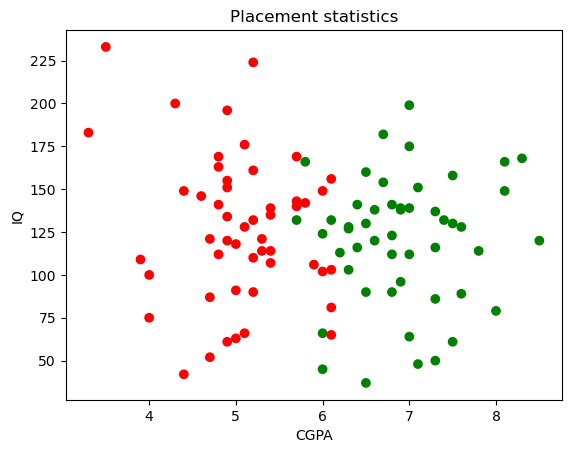

In [38]:
plt.scatter(x='cgpa',y='iq',data=df,color=df['placement'].map({0:'red',1:'green'}))
plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Placement statistics')
plt.show()


In [ ]:
#will design a machine learning model jo data ke piche ka logic smjhe
#logistic regression
#classifies data
#parts data with a line which differentiates data with a line

In [40]:
#extracting input and output columns
# input: cgpa and iq
# output: placement 

x=df.iloc[:,0:2]  #saare rows but 0 and 1 column
y=df.iloc[:,-1]   #saare rows but last column

In [42]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [46]:
y.to_frame()

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [50]:
#train test model

from sklearn.model_selection import train_test_split

#train_test_split(input,output,test size: means total data me se kitna test ke liye rakhna hai)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

#shows splitted data
#x_train=input of training data
#x_test: input for for testing data
#y_train: input of training data
#y_test:output of testing data

In [52]:
x_train

,cgpa,iq
62,6.0,102.0
66,6.9,96.0
38,6.5,160.0
87,5.7,132.0
63,6.3,128.0
...,...,...
8,6.1,156.0
11,6.9,138.0
71,6.1,132.0
94,4.7,52.0


In [54]:
y_train

62    0
66    1
38    1
87    1
63    1
     ..
8     0
11    1
71    1
94    0
39    0
Name: placement, Length: 90, dtype: int64

In [56]:
x_test

,cgpa,iq
82,6.5,37.0
97,6.7,182.0
27,6.0,124.0
55,7.8,114.0
29,7.0,112.0
96,4.4,42.0
50,3.5,233.0
49,5.4,135.0
3,7.4,132.0
77,7.3,50.0


In [58]:
y_test

82    1
97    1
27    1
55    1
29    1
96    0
50    0
49    0
3     1
77    1
Name: placement, dtype: int64

In [ ]:
#hence we saw training and testing data

In [ ]:
#scaling values

In [60]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
# fit_transform tranforms data between -1 to 1

In [70]:
x_train

array([[ 0.02893686, -0.60741438],
       [ 0.83717319, -0.77003399],
       [ 0.47795704,  0.96457524],
       [-0.24047525,  0.2056837 ],
       [ 0.29834897,  0.09727062],
       [-0.5996914 , -0.09245226],
       [-1.04871159,  0.44961312],
       [-0.95890755, -0.11955553],
       [-1.04871159,  1.04588505],
       [-0.77929948,  0.09727062],
       [ 0.92697723,  0.39540658],
       [-2.39577214,  1.58795043],
       [ 1.19638934, -1.04106669],
       [-0.68949544,  0.99167851],
       [-0.50988737,  0.39540658],
       [-1.76714388, -0.66162092],
       [ 0.83717319,  0.39540658],
       [ 1.91482163,  1.12719485],
       [-0.50988737, -0.47189803],
       [ 1.19638934, -0.22796861],
       [-1.13851562, -1.01396342],
       [-0.5996914 , -0.28217515],
       [-0.95890755,  1.94029293],
       [ 0.02893686, -2.15230073],
       [-1.13851562, -0.09245226],
       [-0.77929948, -1.58313207],
       [ 1.82501759, -1.23078957],
       [-0.77929948,  1.39822755],
       [-1.49773177,

In [64]:
x_test=scaler.fit_transform(x_test)

In [66]:
x_test

array([[ 0.22742941, -1.34050661],
       [ 0.37904902,  1.11680639],
       [-0.15161961,  0.13388119],
       [ 1.21295687, -0.03558867],
       [ 0.60647843, -0.06948264],
       [-1.36457648, -1.25577168],
       [-2.04686472,  1.98110269],
       [-0.60647843,  0.32029804],
       [ 0.90971765,  0.26945708],
       [ 0.83390785, -1.12019579]])

In [ ]:
#now train the model
#using logistic regression 

In [72]:
from sklearn.linear_model import LogisticRegression

In [74]:
clf=LogisticRegression()   #creating an object classifier to use the model 
clf.fit(x_train,y_train)   #model training step

LogisticRegression()

In [ ]:
#as it is a small dataset, it instantly trained itself

In [ ]:
#evaluating the model
#test wale data ke upar accuracy nikalte hai

In [88]:
y_pred=clf.predict(x_test)
#we are evaluating the model. 
# 10% data test ke liye rakhe the. ab usi data ko evaluate kar rah ehai with the function predict. 
# it took the input test value and gave output

In [90]:
y_pred

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 1], dtype=int64)

In [80]:
y_test

82    1
97    1
27    1
55    1
29    1
96    0
50    0
49    0
3     1
77    1
Name: placement, dtype: int64

In [ ]:
#actual y_test se 90% data match kiya (9 out 0f 10 data is right)
# model accuracy is 90%

In [ ]:
# instead of manually seeing the accuracy we can also use metrics module from the sklearn

In [92]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9

In [ ]:
#that is 90% (what we manually seen)

In [ ]:
# Using DECISION BOUNDARY to visualize what model analyses to give this resul

In [109]:
!pip install mlxtend


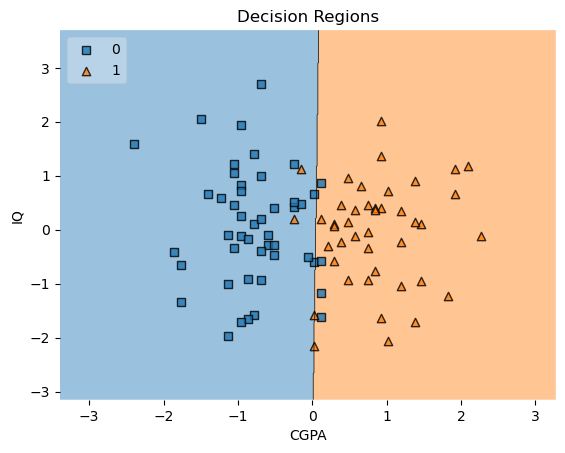

In [113]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

# Ensure x_train is a 2D array and y_train is a 1D array
x_train = x_train.values if hasattr(x_train, 'values') else x_train
y_train = y_train.values if hasattr(y_train, 'values') else y_train

# Plotting decision regions
plot_decision_regions(X=x_train, y=y_train, clf=clf, legend=2)

plt.xlabel('CGPA')
plt.ylabel('IQ')
plt.title('Decision Regions')
plt.show()


In [115]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))

#this is the model created which is deployed to the website